In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
zero=cv2.imread('0.jpg')
one =cv2.imread('1.jpg')
two =cv2.imread('2.jpg')
three =cv2.imread('3.jpg')
four =cv2.imread("4.jpg")
five =cv2.imread('5.jpg')
six =cv2.imread('6.jpg')
seven =cv2.imread("7.jpg")
eight =cv2.imread('8.jpg')
nine = cv2.imread('9.jpg')
# cv2.imshow("img",zero)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

10


<ipython-input-3-0d3bbd842d8a>:53: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,2,index+1);plt.imshow(stacked[:,:,::-1]);


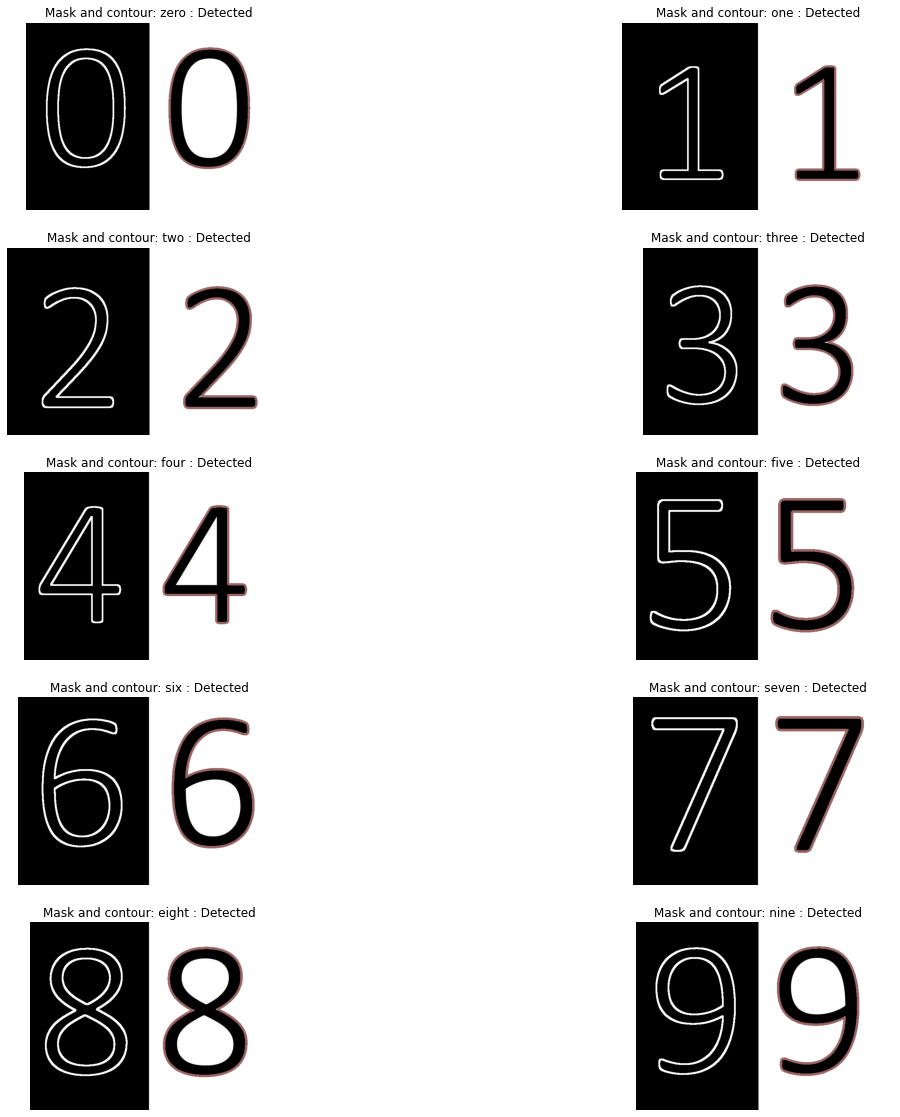

In [3]:


# Save all shapes in a list
allshapes = [zero,one,two,three,four,five,six,seven,eight,nine]

# Save the names of all shapes in the same order.
shapenames= ["zero","one","two","three","four","five","six","seven","eight","nine"]

# create a list for storing contours of each shape
allcontours=[]

# no of rows for plotting (divided by 2 cause we are using 2 columns)
rows = np.ceil(len(allshapes)/2)

# set figsize
plt.figure(figsize=[20,20])
print(len(allshapes))
# Now loop over all shapes
for index,shape in enumerate(allshapes):
#     print(len(shape))
    # perform edge detection
    mask = cv2.Canny(shape,100,300)

    # dilate the mask so there are no gaps in the main contour
    mask = cv2.dilate(mask,None,iterations = 2)

    # find contours
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    # Make sure you detected a contour
    if contours:
        
        # state  = detected if you successfully detect a contour and vice versa.
        state = 'Detected'
        
        # Make sure you're extracting a single contour and the maximum one from the image
        c = max(contours, key = cv2.contourArea)

        # draw the contour over the shape (just for visualization)
        cv2.drawContours(shape, [c], 0, (100,100,155), 5)

        # Append the contour in the contour list.
        allcontours.append(c)
    
    else:
        state = 'Not Detected'
    
    # make the mask 3 channeled
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # Stack mask and contour together
    stacked = np.hstack((mask,shape))
    
    # draw each contour with masks and their names.
    plt.subplot(rows,2,index+1);plt.imshow(stacked[:,:,::-1]);
    plt.title("Mask and contour: {} : {}".format(shapenames[index],state));plt.axis('off')        

In [4]:
def shape_detector(test_image = None, display = True, thresh = 0.3):
      
        # if the user has not specified any image then open up a file selector so that he can select a file.
        if test_image is None:
            Tk().withdraw() 
            filename = askopenfilename() 
            test_image = cv2.imread(filename)
            
        original = test_image.copy()
        
        # extract the edge mask
        mask = cv2.Canny(test_image,100,300)

        # dilate the mask so there are no gaps in the main contour (comment this line to see the gaps)
        mask = cv2.dilate(mask,None,iterations = 1)

        # detect contours
        contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            for test_contour in contours:

                # get a bounding box around each contour and draw it.
                x,y,w,h = cv2.boundingRect(test_contour)
                cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),3)

                scores=[]

                # Now for each shape go over all saved contours and save the matchshape score
                for cnt in allcontours:
                    score = cv2.matchShapes(test_contour,cnt,1,0.0)
                    scores.append(score)

                # Grab the index of lowest scoring contour
                pos = np.argmin(np.array(scores))

                # Also grab the minimum score.
                finalscore = min(scores)

                # Make sure the lowest score is below some threshold so we can also label unkown shapes
                if finalscore < thresh:

                    # set label of the detected shape using the index we got previously 
                    label = shapenames[pos]

                else:
                    label = 'Unknown Shape'


                cv2.putText(test_image, label, (x,y+h+16), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,55,50), 2, cv2.LINE_AA)
        else: 
            return None
        
        # if display is true then plot the image.
        if display:
            plt.figure(figsize=[15,15])
            plt.subplot(1,2,1);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
            plt.subplot(1,2,2);plt.imshow(test_image[:,:,::-1]);plt.title("Shape Detection");plt.axis('off');
            
        else:
            return test_image

In [5]:
# This is our toggle variable , it will be false initially
drawing= False

# creating a named window to attach the mouse callback function.
cv2.namedWindow('image')


# Initilizing the x1,y1 and x2,y2 variables, these will be used to draw the line.
# x1 is None whenever there is no previous x1,y1 points which is true initially.
x1 =None
x2 =0
y1 =0
y2=0



# This function toggles drawing variable to True or False depending upon if the mouse is pressed or not
# It also stores the mouse's coordinates in x2,y2 variables as the mouse moves.
def draw_line(event,x,y,flags,param):
    global x1, x2, y2,drawing

    if event == cv2.EVENT_MOUSEMOVE:
        x2= x
        y2= y       

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# set some custom width and height
width = 1000
height = 600

# create a black image, predictions will be drawn on this image
img_draw = np.zeros((height,width,3), np.uint8)

# This image is used to predict
img = np.zeros((height,width,3), np.uint8)


# Attach the window and the function to the mouse call back funtion
cv2.setMouseCallback('image',draw_line)

while True:
    
    # Only draw if drawing is true
    if drawing:
        
        # x1 is not None means we have some previous x1,y1 points which we can use to draw on the image.
        if x1 is not None:                  
            img = cv2.line(img, (x1,y1),(x2,y2), [255,255,255], 5)
            img_draw = cv2.line(img, (x1,y1),(x2,y2), [255,255,255], 5)


            # When we are done drawing the line then the x2,y2 becomes x1,y1 for the next line.
            x1= x2
            y1 = y2
            
        else:
            # If there was no x1,y1 available (which means either the mouse was pressed up or this is the first run of the 
            # program) then we want to initilize them as x2,y2
            x1,y1 = x2,y2
   
    else:
        # x1 is made None if the mouse is up.
        x1 = None

    cv2.imshow('image',img_draw)

    # If the user presses `c` then clear the image.
    k= cv2.waitKey(1)
    if k  == ord('c'):
        img = np.zeros((height,width,3), np.uint8)
        img_draw = np.zeros((height,width,3), np.uint8)

    # If p is pressed then you predict on the image.    
    elif k  == ord('p'):
       img_draw = shape_detector(img.copy(),display = False)  

    elif k  == 27:
        break
                
cv2.destroyAllWindows()

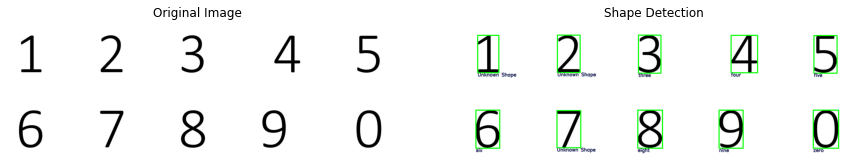

In [6]:
# Lets use an image we have containing multiple shapes.
test_image = cv2.imread('test.jpg')  

original = test_image.copy()

# extract the edge mask
mask = cv2.Canny(test_image,100,300)

# dilate the mask so there are no gaps in the main contour (comment this line to see the gaps)
mask = cv2.dilate(mask,None,iterations = 1)

# detect contours
contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


thresh = 0.3
for test_contour in contours:
    
    # get a bounding box around each contour and draw it.
    x,y,w,h = cv2.boundingRect(test_contour)
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),3)

    scores=[]

    # Now for each shape go over all saved contours and save the matchshape score
    for cnt in allcontours:
        score = cv2.matchShapes(test_contour,cnt,1,0.0)
        scores.append(score)

    # Grab the index of lowest scoring contour
    pos = np.argmin(np.array(scores))

    # Also grab the minimum score.
    finalscore = min(scores)

    # Make sure the lowest score is below some threshold so we can also label unkown shapes
    if finalscore < thresh:

        # set label of the detected shape using the index we got previously 
        label = shapenames[pos]

    else:
        label = 'Unknown Shape'


    cv2.putText(test_image, label, (x,y+h+16), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,55,50), 2, cv2.LINE_AA)

plt.figure(figsize=[15,15])
plt.subplot(1,2,1);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(1,2,2);plt.imshow(test_image[:,:,::-1]);plt.title("Shape Detection");plt.axis('off');